In [24]:
 %pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [25]:
from tvb.simulator.lab import *
from tvb.simulator.plot.phase_plane_interactive import PhasePlaneInteractive
import numpy as np

In [26]:
# set up the model: a generic 2-d oscillator model with default parameters
Model=models.Generic2dOscillator()
Model

a,[-2.]
tau,[ 1.]
c,[ 0.]
b,[-10.]
e,[ 3.]
d,[ 0.02]
g,[ 0.]
f,[ 1.]
I,[ 0.]
state_variable_range,"{'W': array([-6., 6.]), 'V': array([-2., 4.])}"
beta,[ 1.]


<IPython.core.display.Javascript object>


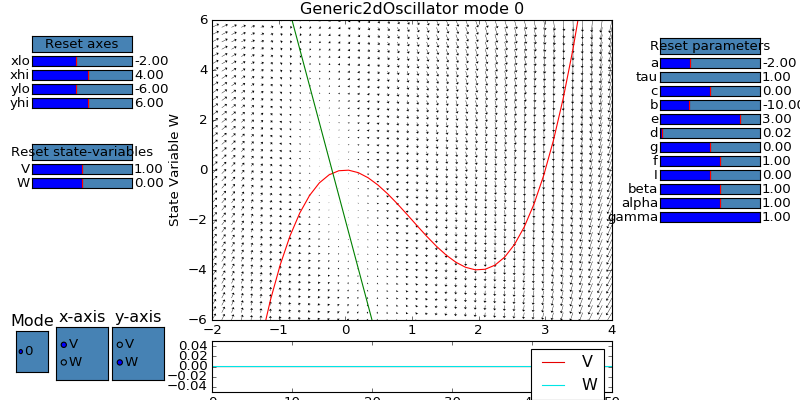

In [27]:
# Explore the model
figPhase=PhasePlaneInteractive(model=Model)
figPhase.show()

In [28]:
connections=connectivity.Connectivity.from_file('connectivity_96.zip')
connections.speed=numpy.array(4.0) # 4 m/s
connections.weights.shape
connections.region_labels

WARNING  File 'hemispheres' not found in ZIP.


array(['RM-TCpol_R', 'RM-TCs_R', 'RM-Amyg_R', 'RM-PFCoi_R', 'RM-IA_R',
       'RM-PFCom_R', 'RM-TCc_R', 'RM-PFCol_R', 'RM-TCi_R', 'RM-PHC_R',
       'MM82a-G_R', 'RM-PMCvl_R', 'RM-VACv_R', 'RM-Ip_R', 'RM-PFCpol_R',
       'RM-HC_R', 'RM-CCs_R', 'RM-PFCvl_R', 'RM-V2_R', 'RM-PFCm_R',
       'RM-TCv_R', 'RM-VACd_R', 'RM-V1_R', 'RM-PFCcl_R', 'RM-A2_R',
       'RM-CCr_R', 'RM-CCp_R', 'RM-CCa_R', 'RM-S2_R', 'RM-S1_R', 'RM-A1_R',
       'RM-M1_R', 'RM-PCi_R', 'RM-PCm_R', 'RM-PFCdm_R', 'RM-PCip_R',
       'RM-PCs_R', 'RM-FEF_R', 'RM-PFCdl_R', 'RM-PMCm_R', 'RM-PMCdl_R',
       'TM-F_R', 'TM-T_R', 'TM-OP_R', 'BG-Cd_R', 'BG-Pu_R', 'BG-Pa_R',
       'BG-Acc_R', 'RM-TCpol_L', 'RM-TCs_L', 'RM-Amyg_L', 'RM-PFCoi_L',
       'RM-IA_L', 'RM-PFCom_L', 'RM-TCc_L', 'RM-PFCol_L', 'RM-TCi_L',
       'RM-PHC_L', 'MM82a-G_L', 'RM-PMCvl_L', 'RM-VACv_L', 'RM-Ip_L',
       'RM-PFCpol_L', 'RM-HC_L', 'RM-CCs_L', 'RM-PFCvl_L', 'RM-V2_L',
       'RM-PFCm_L', 'RM-TCv_L', 'RM-VACd_L', 'RM-V1_L', 'RM-PFCcl_L',
       'R

In [33]:
# Set other components of the model
# based on the tutorials, appropriate for the 2-d oscillator with default 
# parameters and the default connectivity structure
# Presigmoidal: H * (Q + \tanh(G * (P*x - \theta))) is not Sigmoidal! I do not know why Shine et al. used this
T=0.0154*np.ones([96,])
connections_coupling=coupling.PreSigmoidal(G=0.5,theta=0.0,dynamic=False)
# determine integration scheme this value is from the tutorial
heunint = integrators.HeunDeterministic(dt=2**-6)
#Initialise some Monitors with period in physical time
mon_raw = monitors.Raw()
mon_tavg = monitors.TemporalAverage(period=2**-2)

#Bundle them
what_to_watch = (mon_raw, mon_tavg)

In [34]:
# Now bring all components together
init = np.ones([2403, 2, 96, 1]) 
sim = simulator.Simulator(model = Model, connectivity = connections,
                          coupling = connections_coupling, 
                          integrator = heunint, initial_conditions=init, 
                          monitors = what_to_watch)

# init = np.zeros(sim.good_history_shape)  To set initial conditions you need to know the history
# init.shape

sim.configure()

initial_conditions,"[[[[ 1.] [ 1.] [ 1.] ..., [ 1.] [ 1.] [ 1.]] [[ 1.] [ 1.] [ 1.] ..., [ 1.] [ 1.] [ 1.]]] [[[ 1.] [ 1.] [ 1.] ..., [ 1.] [ 1.] [ 1.]] [[ 1.] [ 1.] [ 1.] ..., [ 1.] [ 1.] [ 1.]]] [[[ 1.] [ 1.] [ 1.] ..., [ 1.] [ 1.] [ 1.]] [[ 1.] [ 1.] [ 1.] ..., [ 1.] [ 1.] [ 1.]]] ..., [[[ 1.] [ 1.] [ 1.] ..., [ 1.] [ 1.] [ 1.]] [[ 1.] [ 1.] [ 1.] ..., [ 1.] [ 1.] [ 1.]]] [[[ 1.] [ 1.] [ 1.] ..., [ 1.] [ 1.] [ 1.]] [[ 1.] [ 1.] [ 1.] ..., [ 1.] [ 1.] [ 1.]]] [[[ 1.] [ 1.] [ 1.] ..., [ 1.] [ 1.] [ 1.]] [[ 1.] [ 1.] [ 1.] ..., [ 1.] [ 1.] [ 1.]]]]"
coupling,"PreSigmoidal(H=0.5, Q=1, G=0.5, P=1, theta=0, dynamic=False, globalT=False)"
stimulus,None
integrator,HeunDeterministic(dt=0.015625)
surface,None
connectivity,"Connectivity(bound=False, value=None)"
conduction_speed,3.0
simulation_length,1000.0
model,"Generic2dOscillator(bound=False, value=None)"
monitors,"(Raw(bound=False, value=None), TemporalAverage(bound=False, value=None))"


In [35]:
#Perform the simulation
raw_data = []
raw_time = []
tavg_data = []
tavg_time = []

for raw, tavg in sim(simulation_length=1e3):
    if not raw is None:
        raw_time.append(raw[0])
        raw_data.append(raw[1])
    
    if not tavg is None:
        tavg_time.append(tavg[0])
        tavg_data.append(tavg[1])
        
RAW = numpy.array(raw_data)
TAVG = numpy.array(tavg_data)

<IPython.core.display.Javascript object>


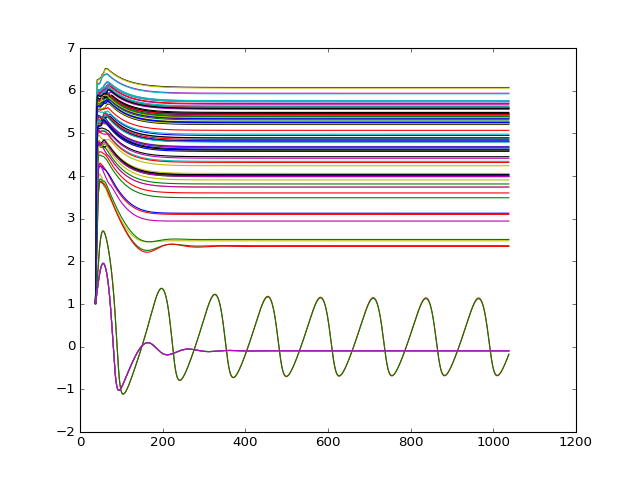

<IPython.core.display.Javascript object>


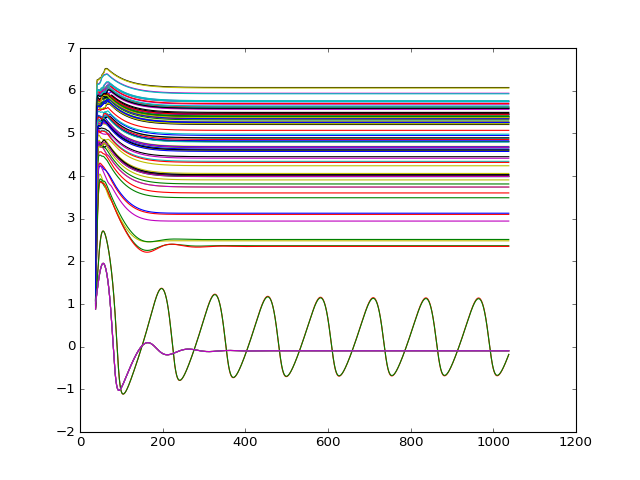

In [36]:
figure()
plot(raw_time, RAW[:, 0,:, 0])
show()

figure()
plot(tavg_time, TAVG[:, 0,:, 0])
show()

In [29]:
coupling.PreSigmoidal??